In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Mathematical Foundations for Linear Regression")
print("=" * 50)


📚 Mathematical Foundations for Linear Regression


## 1. Linear Algebra Basics

### Vectors và Matrix Operations
Linear Regression sử dụng nhiều phép toán vector và ma trận. Hãy ôn lại:


In [7]:
# Vector operations
print("🔢 Vector Operations")
print("-" * 30)

# Tạo vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f"Vector a: {a}")
print(f"Vector b: {b}")
print(f"a + b = {a + b}")
print(f"a * b (element-wise) = {a * b}")
print(f"Dot product a·b = {np.dot(a, b)}")
print(f"||a|| (norm) = {np.linalg.norm(a):.3f}")

# Matrix operations
print("\n🔢 Matrix Operations")
print("-" * 30)

# Tạo matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(f"Matrix A:\n{A}")
print(f"Matrix B:\n{B}")
print(f"A + B:\n{A + B}")
print(f"A * B (element-wise):\n{A * B}")
print(f"A @ B (matrix multiplication):\n{A @ B}")
print(f"A^T (transpose):\n{A.T}")


🔢 Vector Operations
------------------------------
Vector a: [1 2 3]
Vector b: [4 5 6]
a + b = [5 7 9]
a * b (element-wise) = [ 4 10 18]
Dot product a·b = 32
||a|| (norm) = 3.742

🔢 Matrix Operations
------------------------------
Matrix A:
[[1 2]
 [3 4]]
Matrix B:
[[5 6]
 [7 8]]
A + B:
[[ 6  8]
 [10 12]]
A * B (element-wise):
[[ 5 12]
 [21 32]]
A @ B (matrix multiplication):
[[19 22]
 [43 50]]
A^T (transpose):
[[1 3]
 [2 4]]


## 2. Calculus for Machine Learning

### Derivatives và Partial Derivatives
Gradient Descent cần tính đạo hàm để tìm minimum của cost function.


📊 So sánh đạo hàm số và đạo hàm giải tích
--------------------------------------------------
x =  -3.00: Numerical = -6.000, Analytical = -6.000
x =  -2.33: Numerical = -4.667, Analytical = -4.667
x =  -1.67: Numerical = -3.333, Analytical = -3.333
x =  -1.00: Numerical = -2.000, Analytical = -2.000
x =  -0.33: Numerical = -0.667, Analytical = -0.667
x =   0.33: Numerical =  0.667, Analytical =  0.667
x =   1.00: Numerical =  2.000, Analytical =  2.000
x =   1.67: Numerical =  3.333, Analytical =  3.333
x =   2.33: Numerical =  4.667, Analytical =  4.667
x =   3.00: Numerical =  6.000, Analytical =  6.000


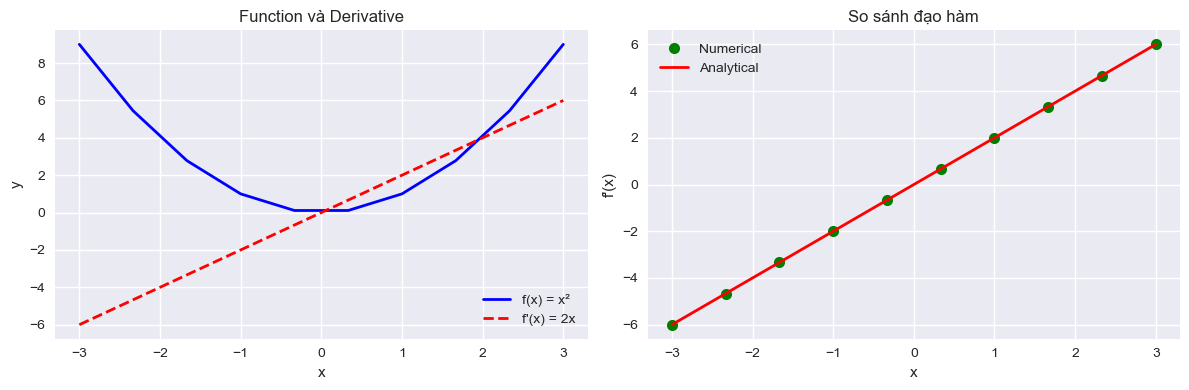

In [8]:
# Numerical derivatives
def numerical_derivative(f, x, h=1e-5):
    """Tính đạo hàm số của hàm f tại điểm x"""
    return (f(x + h) - f(x - h)) / (2 * h)

# Ví dụ: f(x) = x²
def f(x):
    return x**2

# Đạo hàm thực tế: f'(x) = 2x
def f_prime(x):
    return 2*x

# So sánh
x_values = np.linspace(-3, 3, 10)
numerical_derivatives = [numerical_derivative(f, x) for x in x_values]
analytical_derivatives = [f_prime(x) for x in x_values]

print("📊 So sánh đạo hàm số và đạo hàm giải tích")
print("-" * 50)
for i, x in enumerate(x_values):
    print(f"x = {x:6.2f}: Numerical = {numerical_derivatives[i]:6.3f}, Analytical = {analytical_derivatives[i]:6.3f}")

# Visualize
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_values, [f(x) for x in x_values], 'b-', label='f(x) = x²', linewidth=2)
plt.plot(x_values, analytical_derivatives, 'r--', label="f'(x) = 2x", linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function và Derivative')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_values, numerical_derivatives, 'go', label='Numerical', markersize=8)
plt.plot(x_values, analytical_derivatives, 'r-', label='Analytical', linewidth=2)
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title('So sánh đạo hàm')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 3. Cost Functions

### Mean Squared Error (MSE)
Cost function phổ biến nhất cho Linear Regression:


📊 So sánh Cost Functions
----------------------------------------
True values: [1 2 3 4 5]
Good predictions: [1.1 1.9 3.1 3.9 5.1]
Bad predictions: [2 1 4 3 6]

MSE (Mean Squared Error):
  Good predictions: 0.010
  Bad predictions:  1.000

MAE (Mean Absolute Error):
  Good predictions: 0.100
  Bad predictions:  1.000


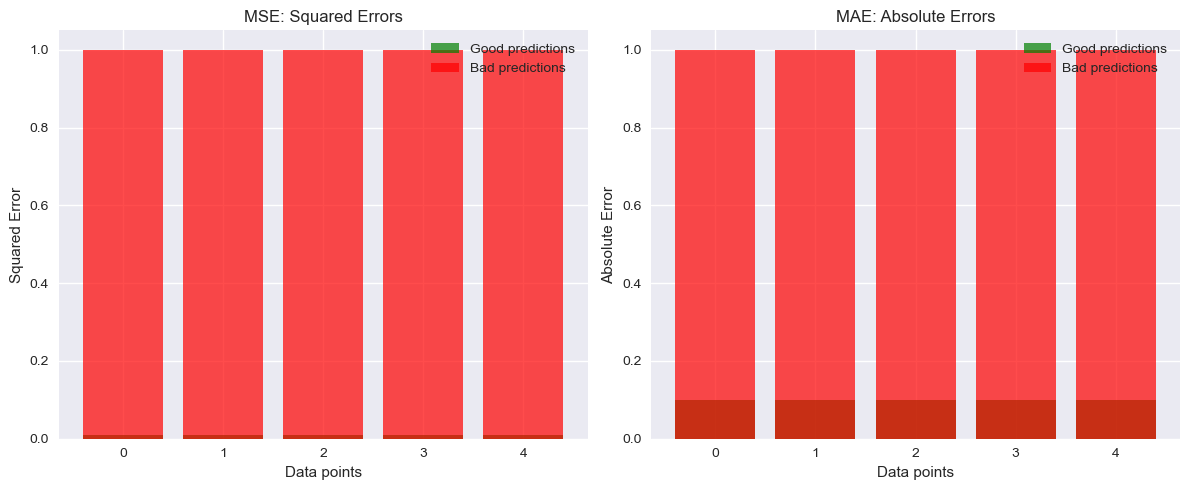

In [4]:
# Cost Functions
def mse(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    """Mean Absolute Error"""
    return np.mean(np.abs(y_true - y_pred))

# Tạo dữ liệu mẫu
np.random.seed(42)
y_true = np.array([1, 2, 3, 4, 5])
y_pred_good = np.array([1.1, 1.9, 3.1, 3.9, 5.1])  # Dự đoán tốt
y_pred_bad = np.array([2, 1, 4, 3, 6])  # Dự đoán kém

print("📊 So sánh Cost Functions")
print("-" * 40)
print(f"True values: {y_true}")
print(f"Good predictions: {y_pred_good}")
print(f"Bad predictions: {y_pred_bad}")
print()

print("MSE (Mean Squared Error):")
print(f"  Good predictions: {mse(y_true, y_pred_good):.3f}")
print(f"  Bad predictions:  {mse(y_true, y_pred_bad):.3f}")
print()

print("MAE (Mean Absolute Error):")
print(f"  Good predictions: {mae(y_true, y_pred_good):.3f}")
print(f"  Bad predictions:  {mae(y_true, y_pred_bad):.3f}")

# Visualize cost functions
plt.figure(figsize=(12, 5))

# MSE visualization
plt.subplot(1, 2, 1)
errors_good = y_true - y_pred_good
errors_bad = y_true - y_pred_bad
plt.bar(range(len(y_true)), errors_good**2, alpha=0.7, label='Good predictions', color='green')
plt.bar(range(len(y_true)), errors_bad**2, alpha=0.7, label='Bad predictions', color='red')
plt.xlabel('Data points')
plt.ylabel('Squared Error')
plt.title('MSE: Squared Errors')
plt.legend()

# MAE visualization
plt.subplot(1, 2, 2)
plt.bar(range(len(y_true)), np.abs(errors_good), alpha=0.7, label='Good predictions', color='green')
plt.bar(range(len(y_true)), np.abs(errors_bad), alpha=0.7, label='Bad predictions', color='red')
plt.xlabel('Data points')
plt.ylabel('Absolute Error')
plt.title('MAE: Absolute Errors')
plt.legend()

plt.tight_layout()
plt.show()


## 4. Gradient Descent Intuition

### Hiểu Gradient Descent qua ví dụ đơn giản
Gradient Descent là thuật toán tối ưu để tìm minimum của cost function.


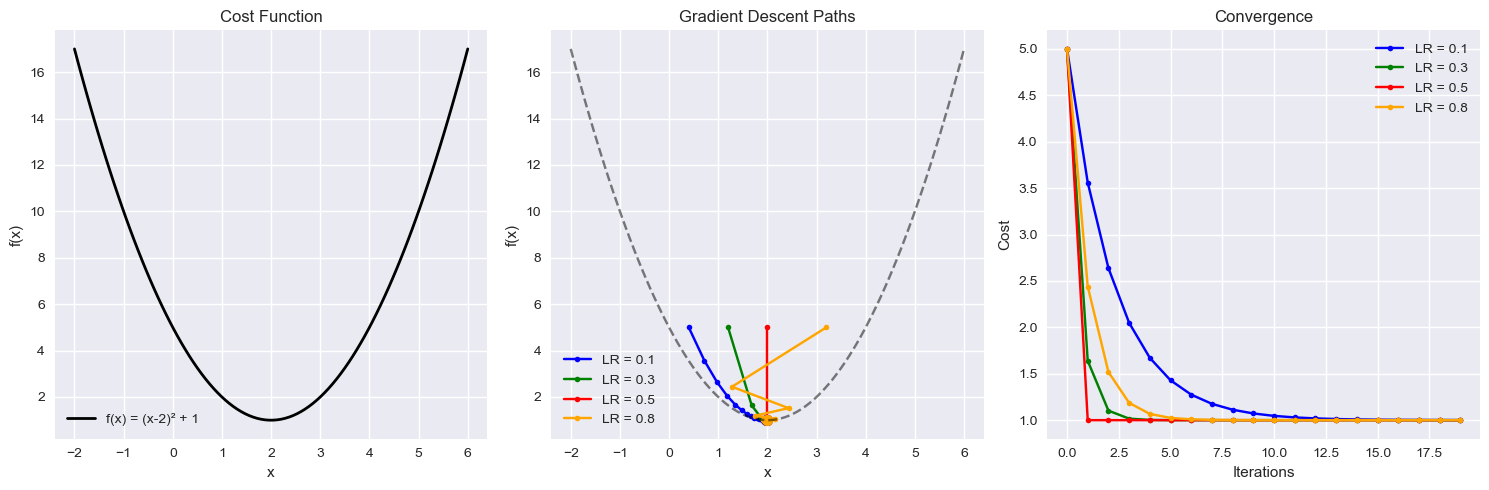

🎯 Kết quả Gradient Descent
----------------------------------------
Learning Rate 0.1: Final x = 1.9769, Final Cost = 1.0005
Learning Rate 0.3: Final x = 2.0000, Final Cost = 1.0000
Learning Rate 0.5: Final x = 2.0000, Final Cost = 1.0000
Learning Rate 0.8: Final x = 1.9999, Final Cost = 1.0000

Optimal x = 2.0, Optimal Cost = 1.0


In [5]:
# Gradient Descent visualization
def simple_cost_function(x):
    """Cost function đơn giản: f(x) = (x-2)² + 1"""
    return (x - 2)**2 + 1

def gradient(x):
    """Gradient của cost function: f'(x) = 2(x-2)"""
    return 2 * (x - 2)

# Gradient Descent implementation
def gradient_descent(start_x, learning_rate, iterations):
    """Gradient Descent đơn giản"""
    x = start_x
    history = []
    
    for i in range(iterations):
        cost = simple_cost_function(x)
        grad = gradient(x)
        x = x - learning_rate * grad
        history.append((x, cost))
    
    return x, history

# Chạy Gradient Descent với các learning rate khác nhau
learning_rates = [0.1, 0.3, 0.5, 0.8]
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(15, 5))

# Plot 1: Cost function
plt.subplot(1, 3, 1)
x_range = np.linspace(-2, 6, 100)
y_range = [simple_cost_function(x) for x in x_range]
plt.plot(x_range, y_range, 'k-', linewidth=2, label='f(x) = (x-2)² + 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Cost Function')
plt.grid(True)
plt.legend()

# Plot 2: Gradient Descent paths
plt.subplot(1, 3, 2)
for lr, color in zip(learning_rates, colors):
    final_x, history = gradient_descent(start_x=0, learning_rate=lr, iterations=20)
    x_path = [h[0] for h in history]
    y_path = [h[1] for h in history]
    plt.plot(x_path, y_path, 'o-', color=color, label=f'LR = {lr}', markersize=4)
    plt.plot(final_x, simple_cost_function(final_x), 'o', color=color, markersize=8)

plt.plot(x_range, y_range, 'k--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Paths')
plt.legend()
plt.grid(True)

# Plot 3: Convergence
plt.subplot(1, 3, 3)
for lr, color in zip(learning_rates, colors):
    final_x, history = gradient_descent(start_x=0, learning_rate=lr, iterations=20)
    costs = [h[1] for h in history]
    plt.plot(costs, 'o-', color=color, label=f'LR = {lr}', markersize=4)

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# In kết quả
print("🎯 Kết quả Gradient Descent")
print("-" * 40)
for lr in learning_rates:
    final_x, history = gradient_descent(start_x=0, learning_rate=lr, iterations=20)
    final_cost = simple_cost_function(final_x)
    print(f"Learning Rate {lr}: Final x = {final_x:.4f}, Final Cost = {final_cost:.4f}")

print(f"\nOptimal x = 2.0, Optimal Cost = 1.0")


## 5. Statistics for Linear Regression

### Correlation và R² Score
Hiểu về mối quan hệ giữa variables và cách đánh giá model.


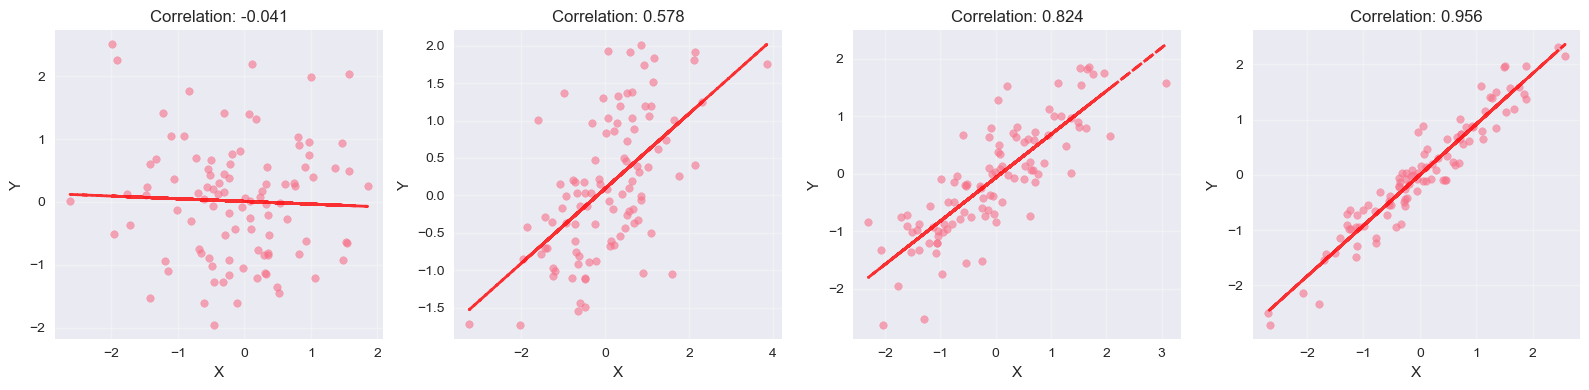

📊 Correlation và R² Analysis
--------------------------------------------------
Dataset 1:
  Target correlation: 0.10
  Actual correlation: -0.041
  R² score: 0.002
  Slope: -0.043, Intercept: 0.007

Dataset 2:
  Target correlation: 0.50
  Actual correlation: 0.578
  R² score: 0.334
  Slope: 0.500, Intercept: 0.093

Dataset 3:
  Target correlation: 0.80
  Actual correlation: 0.824
  R² score: 0.678
  Slope: 0.754, Intercept: -0.072

Dataset 4:
  Target correlation: 0.95
  Actual correlation: 0.956
  R² score: 0.913
  Slope: 0.919, Intercept: -0.001



In [6]:
# Statistics for Linear Regression
np.random.seed(42)

# Tạo dữ liệu có correlation khác nhau
def create_correlated_data(n, correlation):
    """Tạo dữ liệu với correlation cho trước"""
    x = np.random.normal(0, 1, n)
    noise = np.random.normal(0, 1, n)
    y = correlation * x + np.sqrt(1 - correlation**2) * noise
    return x, y

# Tạo datasets với correlation khác nhau
correlations = [0.1, 0.5, 0.8, 0.95]
datasets = []

for corr in correlations:
    x, y = create_correlated_data(100, corr)
    datasets.append((x, y, corr))

# Visualize correlation
plt.figure(figsize=(16, 4))

for i, (x, y, corr) in enumerate(datasets):
    plt.subplot(1, 4, i+1)
    plt.scatter(x, y, alpha=0.6, s=30)
    
    # Tính correlation thực tế
    actual_corr = np.corrcoef(x, y)[0, 1]
    
    # Fit linear regression
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.8, linewidth=2)
    
    plt.title(f'Correlation: {actual_corr:.3f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# R² Score calculation
def r2_score(y_true, y_pred):
    """Calculate R² score"""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

print("📊 Correlation và R² Analysis")
print("-" * 50)

for i, (x, y, corr) in enumerate(datasets):
    # Fit linear regression
    z = np.polyfit(x, y, 1)
    y_pred = z[0] * x + z[1]
    
    r2 = r2_score(y, y_pred)
    actual_corr = np.corrcoef(x, y)[0, 1]
    
    print(f"Dataset {i+1}:")
    print(f"  Target correlation: {corr:.2f}")
    print(f"  Actual correlation: {actual_corr:.3f}")
    print(f"  R² score: {r2:.3f}")
    print(f"  Slope: {z[0]:.3f}, Intercept: {z[1]:.3f}")
    print()


## 🎯 Tóm tắt Mathematical Foundations

Bạn đã học được:
- ✅ **Linear Algebra**: Vector operations, matrix multiplication
- ✅ **Calculus**: Derivatives, numerical vs analytical
- ✅ **Cost Functions**: MSE, MAE và cách so sánh
- ✅ **Gradient Descent**: Intuition và visualization
- ✅ **Statistics**: Correlation, R² score

**Bước tiếp theo**: Chuyển sang notebook 02 để implement Simple Linear Regression từ đầu!


# 📐 Mathematical Foundations

Trong notebook này, bạn sẽ ôn lại các nền tảng toán học:
- Linear algebra: vector, ma trận, nhân ma trận
- Calculus: đạo hàm, đạo hàm riêng
- Statistics: trung bình, phương sai, tương quan
- Optimization: khái niệm gradient và descent

Hãy chạy lần lượt các cell và ghi chú các insight của bạn.


# ## 📚 Chi tiết các bài học và Insights
# 
# ### 1. Linear Algebra - Nền tảng của Machine Learning
# 
# **Tại sao Linear Algebra quan trọng?**
# 
# Linear Algebra là xương sống của Machine Learning. Mọi thuật toán ML đều sử dụng vector và ma trận để biểu diễn dữ liệu và tính toán. Trong Linear Regression:
# - **Dữ liệu đầu vào**: Mỗi sample là một vector trong không gian n chiều
# - **Weights/Parameters**: Được biểu diễn dưới dạng vector
# - **Predictions**: Là kết quả của phép nhân ma trận-vector
# 
# **Key Insights từ bài học:**
# 
# 1. **Vector Operations**: 
#    - Dot product cho phép tính similarity giữa các vector
#    - Magnitude của vector thể hiện "độ lớn" của dữ liệu
#    - Vector normalization giúp so sánh các features có scale khác nhau
# 
# 2. **Matrix Multiplication**:
#    - Cho phép xử lý batch data một cách hiệu quả
#    - Thay vì loop qua từng sample, ta có thể tính toán cho toàn bộ dataset
#    - Vectorization làm code nhanh hơn 10-100 lần
# 
# 3. **Geometric Interpretation**:
#    - Linear regression tìm hyperplane tốt nhất trong không gian n+1 chiều
#    - Mỗi feature là một chiều trong không gian này
#    - Prediction là projection của data point lên hyperplane
# 
# **Practical Applications:**
# - Feature engineering: Tạo ra features mới từ combinations của features cũ
# - Dimensionality reduction: PCA, SVD sử dụng eigenvalues/eigenvectors
# - Deep Learning: Neural networks là chuỗi các phép nhân ma trận
# 
# ---
# 
# ### 2. Calculus - Công cụ tối ưu hóa
# 
# **Tại sao cần Calculus trong ML?**
# 
# Calculus giúp chúng ta tìm minimum của cost function - trái tim của việc training model. Không có calculus, chúng ta không thể:
# - Tính gradient để update parameters
# - Hiểu được convergence behavior
# - Optimize hyperparameters một cách thông minh
# 
# **Key Insights từ bài học:**
# 
# 1. **Derivatives - Tốc độ thay đổi**:
#    - Derivative cho biết cost function thay đổi như thế nào khi parameter thay đổi
#    - Positive derivative: tăng parameter sẽ tăng cost → cần giảm parameter
#    - Negative derivative: tăng parameter sẽ giảm cost → cần tăng parameter
#    - Zero derivative: đã đạt minimum (hoặc maximum/saddle point)
# 
# 2. **Partial Derivatives - Multivariable Optimization**:
#    - Trong thực tế, ta có nhiều parameters cần optimize cùng lúc
#    - Partial derivative cho biết ảnh hưởng của từng parameter riêng lẻ
#    - Gradient vector chứa tất cả partial derivatives
# 
# 3. **Chain Rule - Backpropagation Foundation**:
#    - Cho phép tính derivative của composite functions
#    - Là nền tảng của backpropagation trong neural networks
#    - Giúp hiểu được information flow trong complex models
# 
# **Numerical vs Analytical Derivatives:**
# - Analytical: Chính xác, nhanh, nhưng phức tạp với functions phức tạp
# - Numerical: Gần đúng, chậm, nhưng dễ implement và debug
# - Trong thực tế: Dùng analytical cho production, numerical để verify
# 
# **Advanced Concepts:**
# - Second derivatives (Hessian): Cho biết curvature của cost function
# - Convexity: Đảm bảo global minimum tồn tại và duy nhất
# - Lipschitz continuity: Đảm bảo gradient descent converge
# 
# ---
# 
# ### 3. Cost Functions - Đo lường sai số
# 
# **Tại sao Cost Functions quan trọng?**
# 
# Cost function định nghĩa "tốt" hay "xấu" của model. Việc chọn cost function phù hợp quyết định:
# - Model sẽ học được pattern gì
# - Robust với outliers hay không
# - Convergence speed và stability
# 
# **Key Insights từ bài học:**
# 
# 1. **Mean Squared Error (MSE)**:
#    - **Ưu điểm**: 
#      - Differentiable everywhere → dễ optimize
#      - Penalize large errors heavily → model focus vào big mistakes
#      - Convex → guaranteed global minimum
#    - **Nhược điểm**:
#      - Sensitive với outliers (do bình phương)
#      - Units bị thay đổi (squared units)
#    - **Khi nào dùng**: Khi outliers ít, cần model chính xác cao
# 
# 2. **Mean Absolute Error (MAE)**:
#    - **Ưu điểm**:
#      - Robust với outliers
#      - Interpretable (cùng units với target)
#      - Less biased với skewed distributions
#    - **Nhược điểm**:
#      - Not differentiable tại 0 → optimization khó khăn
#      - Convergence chậm hơn MSE
#    - **Khi nào dùng**: Khi có nhiều outliers, cần robust model
# 
# 3. **Comparison và Trade-offs**:
#    - MSE: "Perfectionist" - muốn mọi prediction đều chính xác
#    - MAE: "Pragmatist" - chấp nhận một số errors để tránh outliers
#    - Huber Loss: Kết hợp cả hai - MSE cho small errors, MAE cho large errors
# 
# **Advanced Cost Functions:**
# - Log-Cosh Loss: Smooth approximation của MAE
# - Quantile Loss: Cho asymmetric cost của over/under prediction
# - Custom Loss: Design theo business requirements cụ thể
# 
# ---
# 
# ### 4. Gradient Descent - Thuật toán tối ưu hóa
# 
# **Tại sao Gradient Descent là game-changer?**
# 
# Trước Gradient Descent, việc tối ưu hóa phụ thuộc vào:
# - Analytical solutions (chỉ có với simple problems)
# - Grid search (exponentially expensive)
# - Random search (inefficient)
# 
# Gradient Descent cho phép optimize bất kỳ differentiable function nào một cách systematic và efficient.
# 
# **Key Insights từ bài học:**
# 
# 1. **Intuition - "Đi xuống đồi"**:
#    - Imagine bạn đang trong sương mù trên một ngọn đồi
#    - Muốn xuống thấp nhất nhưng không nhìn thấy toàn cảnh
#    - Strategy: Cảm nhận độ dốc dưới chân, đi theo hướng dốc nhất
#    - Gradient = độ dốc, Learning rate = size của bước đi
# 
# 2. **Mathematical Foundation**:
#    - Gradient vector chỉ hướng tăng nhanh nhất của function
#    - Negative gradient chỉ hướng giảm nhanh nhất
#    - Update rule: θ = θ - α∇J(θ)
# 
# 3. **Learning Rate - Hyperparameter quan trọng nhất**:
#    - **Quá nhỏ**: Convergence chậm, có thể stuck ở local minimum
#    - **Quá lớn**: Oscillation, divergence, miss minimum
#    - **Vừa phải**: Smooth convergence đến global minimum
#    - **Adaptive**: Thay đổi theo thời gian (learning rate scheduling)
# 
# 4. **Variants và Improvements**:
#    - **Batch GD**: Dùng toàn bộ dataset → stable nhưng chậm
#    - **Stochastic GD**: Dùng 1 sample → nhanh nhưng noisy
#    - **Mini-batch GD**: Compromise giữa stability và speed
#    - **Momentum**: Tích lũy velocity để vượt qua local minima
#    - **Adam**: Adaptive learning rates cho từng parameter
# 
# **Practical Considerations:**
# - Feature scaling: Đảm bảo các features có cùng scale
# - Initialization: Random nhưng không quá lớn/nhỏ
# - Convergence criteria: Khi nào dừng training
# - Debugging: Plot cost function để detect problems
# 
# ---
# 
# ### 5. Statistics - Đánh giá và hiểu dữ liệu
# 
# **Tại sao Statistics quan trọng trong ML?**
# 
# Statistics giúp chúng ta:
# - Hiểu được data distribution và patterns
# - Đánh giá model performance một cách objective
# - Detect overfitting/underfitting
# - Make informed decisions về model selection
# 
# **Key Insights từ bài học:**
# 
# 1. **Correlation - Mối quan hệ tuyến tính**:
#    - **Pearson correlation**: Đo linear relationship
#    - **Range**: [-1, 1] với 0 = no linear relationship
#    - **Interpretation**:
#      - |r| > 0.7: Strong relationship
#      - 0.3 < |r| < 0.7: Moderate relationship  
#      - |r| < 0.3: Weak relationship
#    - **Caveat**: Correlation ≠ Causation, chỉ detect linear relationships
# 
# 2. **R² Score - Coefficient of Determination**:
#    - **Definition**: Proportion of variance explained by model
#    - **Formula**: R² = 1 - (SS_res / SS_tot)
#    - **Interpretation**:
#      - R² = 1: Perfect fit
#      - R² = 0: Model no better than mean
#      - R² < 0: Model worse than mean (overfitting sign)
#    - **Limitations**: 
#      - Luôn tăng khi thêm features (adjusted R² fix this)
#      - Không detect non-linear relationships tốt
# 
# 3. **Anscombe's Quartet - Tầm quan trọng của Visualization**:
#    - 4 datasets với statistics giống hệt nhau
#    - Nhưng patterns hoàn toàn khác nhau khi visualize
#    - **Lesson**: Never trust summary statistics alone
#    - **Always plot your data** trước khi modeling
# 
# 4. **Statistical Assumptions của Linear Regression**:
#    - **Linearity**: Relationship giữa X và y là linear
#    - **Independence**: Observations độc lập với nhau
#    - **Homoscedasticity**: Constant variance của residuals
#    - **Normality**: Residuals follow normal distribution
#    - **No multicollinearity**: Features không highly correlated
# 
# **Advanced Statistical Concepts:**
# - Confidence intervals: Uncertainty quantification
# - Hypothesis testing: Statistical significance
# - Cross-validation: Robust performance estimation
# - Bias-variance tradeoff: Fundamental ML concept
# 
# ---
# 
# ## 🎯 Tổng kết và Next Steps
# 
# **Những gì bạn đã master:**
# 
# 1. **Linear Algebra**: Foundation cho mọi ML algorithms
# 2. **Calculus**: Tools để optimize models
# 3. **Cost Functions**: Cách đo lường và so sánh models
# 4. **Gradient Descent**: Universal optimization algorithm
# 5. **Statistics**: Đánh giá và hiểu model performance
# 
# **Connections giữa các concepts:**
# - Linear Algebra cung cấp data representation
# - Calculus giúp tìm optimal parameters
# - Cost Functions định nghĩa optimization objective
# - Gradient Descent implement optimization process
# - Statistics đánh giá kết quả và guide improvements
# 
# **Preparation cho Linear Regression Implementation:**
# - Bạn đã có đủ mathematical foundation
# - Hiểu được intuition đằng sau algorithms
# - Ready để implement từ scratch và hiểu từng line code
# 
# **Next Notebook Preview:**
# Trong notebook 02, bạn sẽ:
# - Implement Simple Linear Regression từ đầu
# - Apply tất cả concepts đã học
# - Build intuition thông qua hands-on coding
# - Prepare cho Multiple Linear Regression
# 
# 🚀 **Ready to code? Let's move to notebook 02!**
